# Task -1 Anomaly detection
## Student ID1:314635756
## Student ID2:206701187


In [2]:
!pip install oletools

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


In [4]:
#you neet to enter your path"//"
f_path = "C:\\Users\\USER\\Downloads\\conn_attack.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [5]:
#Median of two seperate columns
df[["src_bytes", "dst_bytes"]].median()

src_bytes     249.0
dst_bytes    1661.0
dtype: float64

In [6]:
#Instead of the predefined statistics, specific combinations can be calculated
df.agg(
    {
        "duration_": ["min", "max", "median", "skew"],
        "dst_bytes": ["min", "max", "median", "mean"],
        "src_bytes": ["min", "max", "median", "mean"],
    }
)

,duration_,dst_bytes,src_bytes
min,0.000000,0.000000e+00,0.000000
max,3289.000000,7.068759e+06,54540.000000
median,0.000000,1.661000e+03,249.000000
skew,74.033196,NaN,NaN
mean,NaN,4.473533e+03,474.247898


## Data exploration

### Explore the data, understand the featues, statistics visualize the inputs
#### please try the following tools and extend them: this is for a soft start :) Explain how you explore the data. Why this is important? Please note this are only some examples


skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


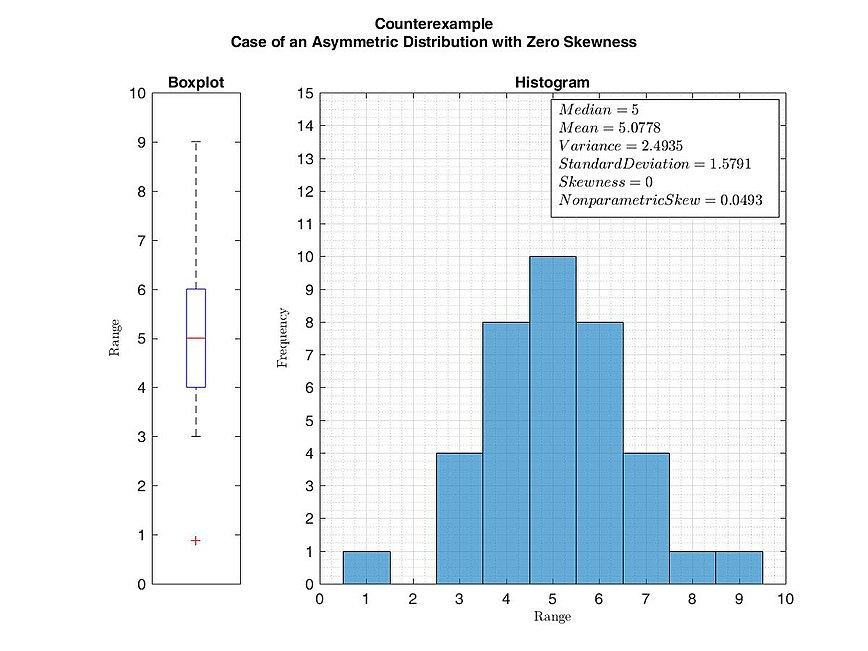

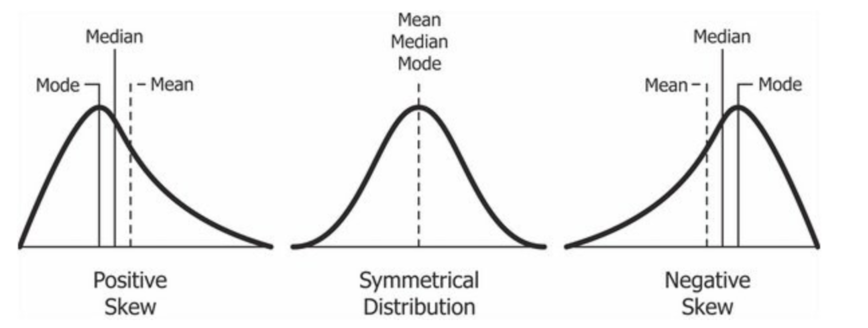

**#Data exploration**- what have you learned:


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='src_bytes', ylabel='Density'>

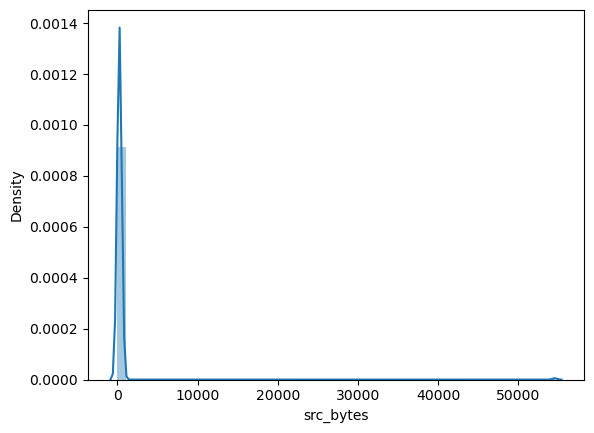

In [7]:
#histogram
sns.distplot(df['src_bytes'])

In [8]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
print("Skewness: %f" % df['src_bytes'].skew())
print("Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

Skewness: 15.824471
Kurtosis: 248.739606


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 207.100418
Kurtosis: 61028.785029


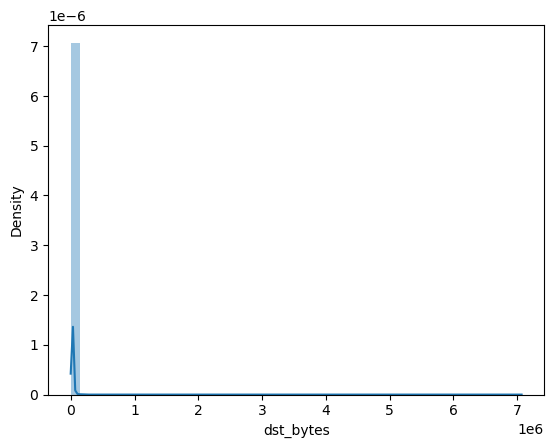

In [9]:
sns.distplot(df['dst_bytes'])
print("Skewness: %f" % df['dst_bytes'].skew())
print("Kurtosis: %f" % df['dst_bytes'].kurt())

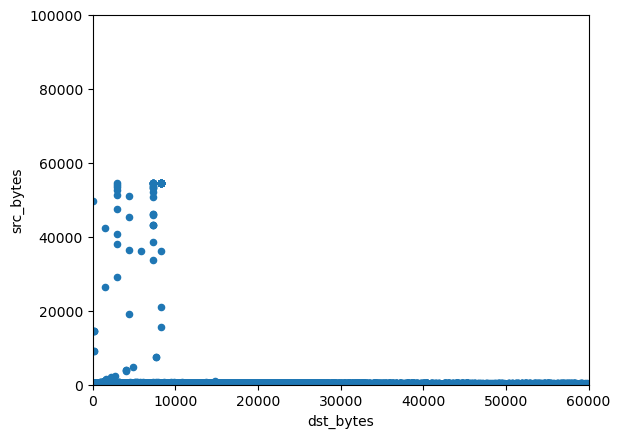

In [10]:
#Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', xlim=(0,60000), ylim=(0,100000)); # do not `assume here any thing this is just examples


we see that the src are more big from the dst
In addition we see that most of the points of view average around 200 to 600 
Note: Distant points are suspect as an anomaly


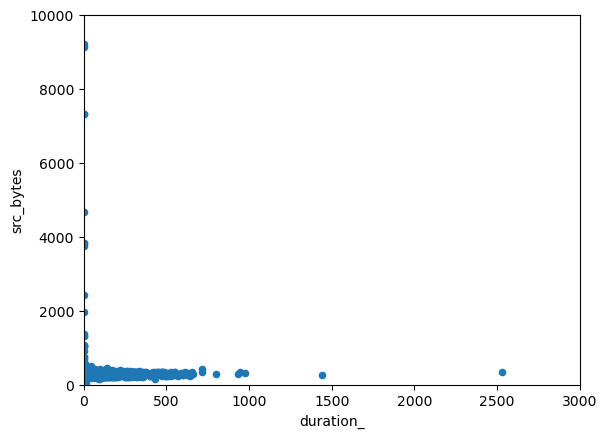

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes',xlim=(0,3000), ylim=(0,10000));

It can be seen that most of the points are concentrated between the values  0-2000 in src_bytes and 0-500 in duration

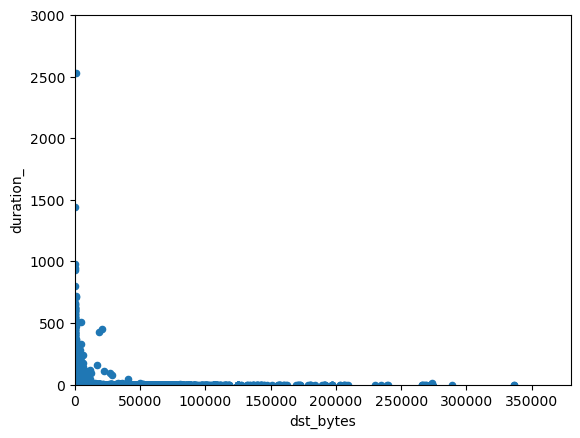

In [12]:
#scatter plot totalbsmtsf/saleprice
var = 'dst_bytes'
data = pd.concat([df['duration_'], df[var]], axis=1)
data.plot.scatter(x=var, y='duration_', xlim=(0,380000), ylim=(0,3000));

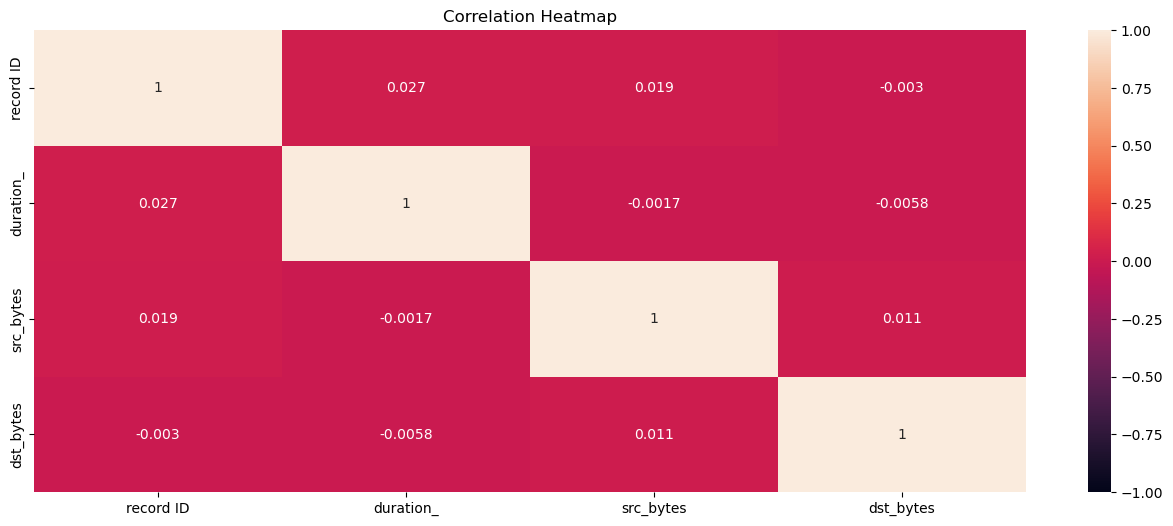

In [13]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

According to the table it can be seen that there is no redundant feature

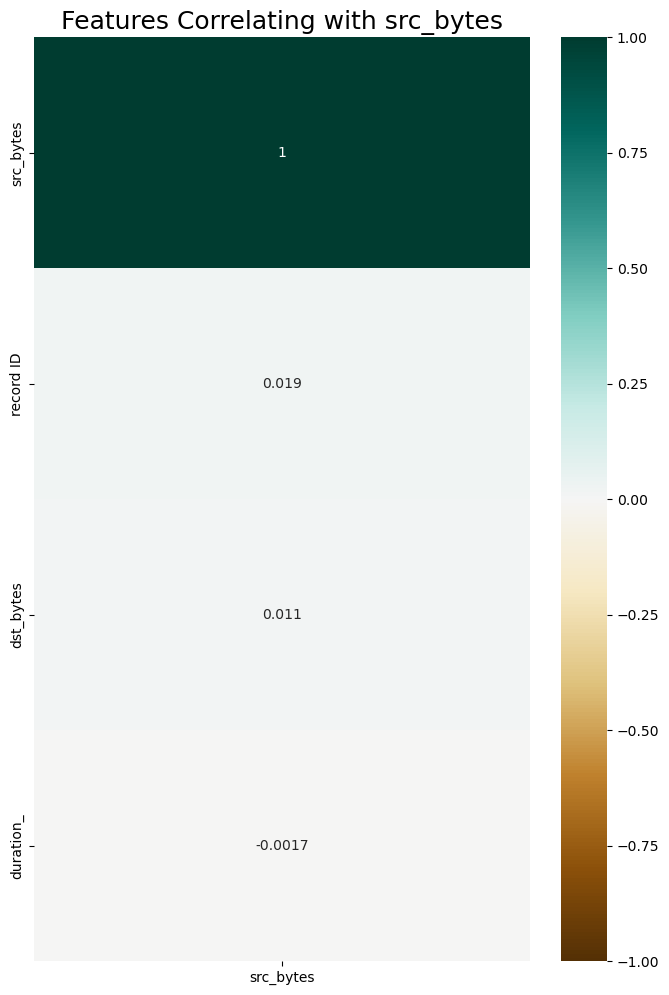

In [14]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

**Which group of algorithms is suitable for this task and why:**


According to data analysis and trial and error
We selected the set of algorithm Unsupervised learning (outlier detection)
  

**A. What approach have you tried? Why them?
  B. How do you know the algorithm is good?**

A. 

First we tried the IsolationForest algorithm because it knows how to isolate suspicious points and according to our data analysis we saw that there are scattered points in the graph and therefore we thought it would be able to classify correctly.
After testing, we saw that the results were not good, so we decided to change the selection of the algorithm to EllipticEnvelope

B.

We looked at the site and found methods to find an anomaly: https://towardsdatascience.com/5-anomaly-detection-algorithms-every-data-scientist-should-know-b36c3605ea16
Then we tried the all methods and found Elliptic Envelope gave us the best result of all.
We read about the method and found in the following link that the contamination parameter is the important one
https://towardsdatascience.com/machine-learning-for-anomaly-detection-elliptic-envelope-2c90528df0a6
We played with it until we got a satisfactory and good result.



In [15]:
# Imports
%matplotlib inline
import pandas as pd

In [16]:
# file path - this for linux windows you will need "//"
f_path = "C:\\Users\\USER\\Downloads\\conn_attack.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

X = list(zip(df["duration_"],df["src_bytes"],df["dst_bytes"]))

In [17]:
#ML
import numpy as np
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(contamination=0.025).fit(X)
# predict returns 1 for an inlier and -1 for an outlier
pred = cov.predict(X)
pred[pred == 1] = 0
pred[pred == -1] = 1

**confusion matrix**

In [18]:
#**you neet to enter your path**
from sklearn.metrics import confusion_matrix
f_path = "C:\\Users\\USER\\Downloads\\conn_attack_anomaly_labels.csv"
ld = pd.read_csv(f_path,names=["lable"], header=None)
y_true = np.array(ld["lable"])
#Results after comparing the data
cm = confusion_matrix(y_true, pred, labels=[0,1])

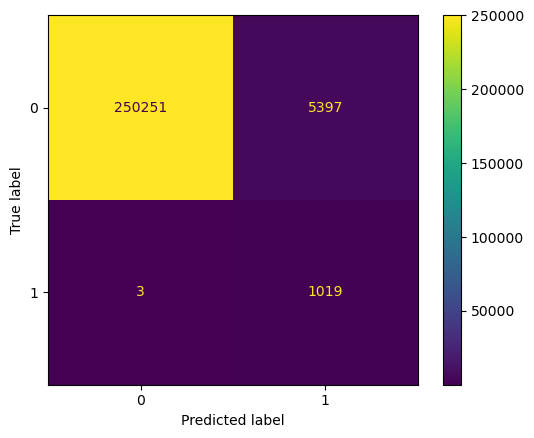

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Accuracy**

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, pred)

0.9789613121907508

**Recall**

In [21]:
from sklearn.metrics import recall_score
recall_score(y_true, pred)

0.99706457925636

In [22]:
index = []
[index.append(i) for i in range(1,len(pred)+1)]
pd.DataFrame({"is_anomaly?":pred, "record_id":index}).to_csv("results.csv",columns=["record_id", "is_anomaly?"], index=None)

**Summary**


In conclusion, to solve the problem we used the Elliptic Envelope algorithm
And the results they got are:
    Accuracy:97%
    Recall:99%

**Link to github** https://github.com/rivkabusila/Anomaly-Detection.git